In [2]:
import pandas as pd
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')

In [3]:
train["subject"].unique()

array(['politicsNews', 'Government News', 'left-news', 'politics',
       'worldnews', 'News', 'Middle-east', 'US_News'], dtype=object)

In [4]:
train.head()

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


In [5]:
(test.columns , train.columns)

(Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'], dtype='object'),
 Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'], dtype='object'))

In [6]:
train["classification_text"]= train["subject"] + " " + train["title"] + " " + train["text"]
test["classification_text"]= test["subject"] + " " + test["title"] + " " + test["text"]

In [7]:
train.drop(columns=["subject", "title", "text" , 'date' , 'Unnamed: 0'], inplace=True)
test.drop(columns=["subject", "title", "text" , 'date' , 'Unnamed: 0'], inplace=True)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import gensim.downloader as api

# BOW Vectorization
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_bow_train = count_vectorizer.fit_transform(train["classification_text"])
X_bow_test = count_vectorizer.transform(test["classification_text"])
feature_names_bow = count_vectorizer.get_feature_names_out()

# Convert sparse matrices to arrays
X_bow_train_array = X_bow_train.toarray()
X_bow_test_array = X_bow_test.toarray()

# Create DataFrames directly
bow_train_df = pd.DataFrame(X_bow_train_array, columns=feature_names_bow)
bow_train_df['label'] = train['label']

bow_test_df = pd.DataFrame(X_bow_test_array, columns=feature_names_bow) 
bow_test_df['label'] = test['label']

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf_train = tfidf_vectorizer.fit_transform(train["classification_text"])
X_tfidf_test = tfidf_vectorizer.transform(test["classification_text"])
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Convert sparse matrices to arrays
X_tfidf_train_array = X_tfidf_train.toarray()
X_tfidf_test_array = X_tfidf_test.toarray()

# Create DataFrames directly
tfidf_train_df = pd.DataFrame(X_tfidf_train_array, columns=feature_names_tfidf)
tfidf_train_df['label'] = train['label']

tfidf_test_df = pd.DataFrame(X_tfidf_test_array, columns=feature_names_tfidf)
tfidf_test_df['label'] = test['label']

# GloVe Embeddings
glove_vectors = api.load('glove-wiki-gigaword-100')

def text_to_glove(text):
    words = text.lower().split()
    word_vectors = [glove_vectors[word] for word in words if word in glove_vectors]
    if len(word_vectors) == 0:
        return np.zeros(100)
    return np.mean(word_vectors, axis=0)

# Process all text at once for GloVe
glove_train_features = [text_to_glove(text) for text in train["classification_text"]]
glove_test_features = [text_to_glove(text) for text in test["classification_text"]]

# Create DataFrames
glove_train_df = pd.DataFrame(glove_train_features, columns=[f'glove_{i}' for i in range(100)])
glove_train_df['label'] = train['label']

glove_test_df = pd.DataFrame(glove_test_features, columns=[f'glove_{i}' for i in range(100)])
glove_test_df['label'] = test['label']


[==================================================] 100.0% 128.1/128.1MB downloaded


In [1]:
print("Saving DataFrames")

Saving DataFrames


In [7]:
import pandas as pd 


bow_train_df = pd.read_csv('bow_train.csv')
bow_test_df = pd.read_csv('bow_test.csv')

In [2]:
# Save BOW DataFrames
import pandas as pd

try:
    pointer = "read"

    if pointer == "write":   
        bow_train_df.to_csv('bow_train.csv', index=False)
        bow_test_df.to_csv('bow_test.csv', index=False)

        # Save TF-IDF DataFrames 
        tfidf_train_df.to_csv('tfidf_train.csv', index=False)
        tfidf_test_df.to_csv('tfidf_test.csv', index=False)

        # Save GloVe DataFrames
        glove_train_df.to_csv('glove_train.csv', index=False)
        glove_test_df.to_csv('glove_test.csv', index=False)

    if pointer == "read":
        # Check if files exist before reading
        required_files = ['bow_train.csv', 'bow_test.csv', 
                         'tfidf_train.csv', 'tfidf_test.csv',
                         'glove_train.csv', 'glove_test.csv']
        
        import os
        missing_files = [f for f in required_files if not os.path.exists(f)]
        if missing_files:
            raise FileNotFoundError(f"Missing required files: {missing_files}")

        bow_train_df = pd.read_csv('bow_train.csv')
        bow_test_df = pd.read_csv('bow_test.csv')

        tfidf_train_df = pd.read_csv('tfidf_train.csv')
        tfidf_test_df = pd.read_csv('tfidf_test.csv')

        glove_train_df = pd.read_csv('glove_train.csv')
        glove_test_df = pd.read_csv('glove_test.csv')

except Exception as e:
    print(f"Error occurred: {str(e)}")
    raise



BOW Features Results (Using BOW Embeddings):
--------------------------------------------------
Training Results:
Accuracy: 0.9816
Precision: 0.9651
Recall: 0.9983
F1 Score: 0.9814

Validation Results:
Accuracy: 0.9802
Precision: 0.9623
Recall: 0.9976
F1 Score: 0.9796

Testing Results:
Accuracy: 0.9817
Precision: 0.9653
Recall: 0.9980
F1 Score: 0.9814


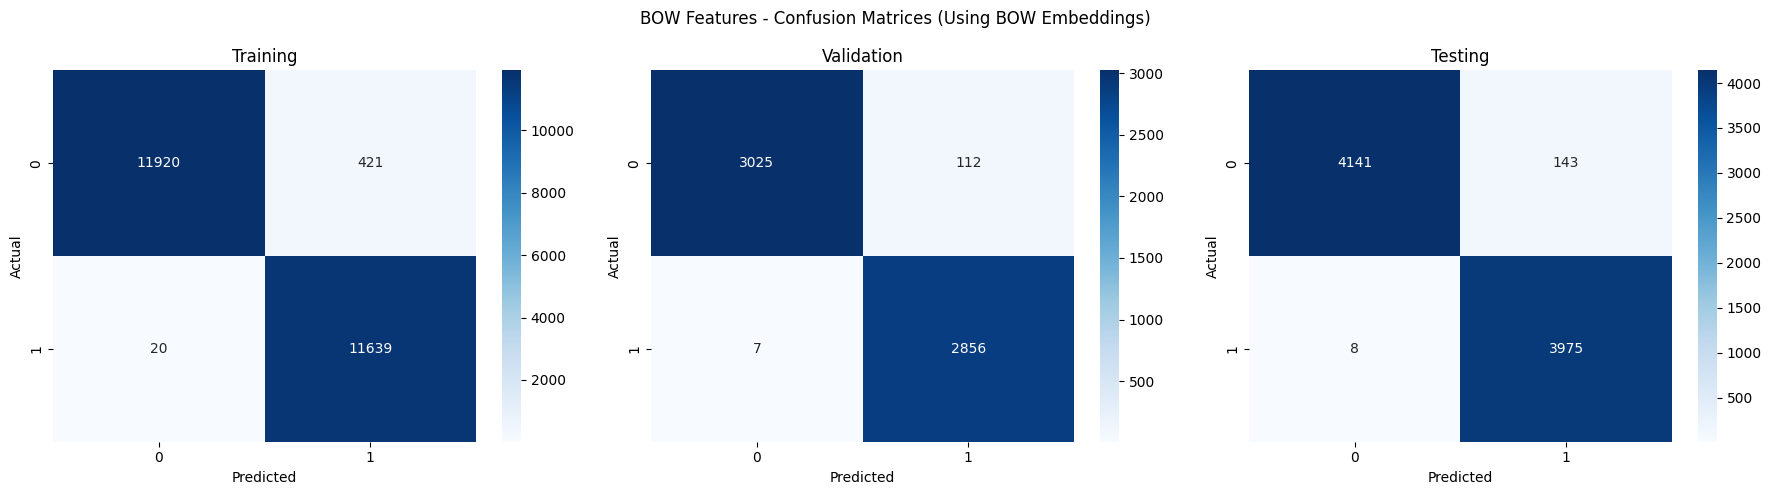


TF-IDF Features Results (Using TF-IDF Embeddings):
--------------------------------------------------
Training Results:
Accuracy: 0.9578
Precision: 0.9432
Recall: 0.9717
F1 Score: 0.9572

Validation Results:
Accuracy: 0.9542
Precision: 0.9432
Recall: 0.9619
F1 Score: 0.9524

Testing Results:
Accuracy: 0.9573
Precision: 0.9446
Recall: 0.9681
F1 Score: 0.9562


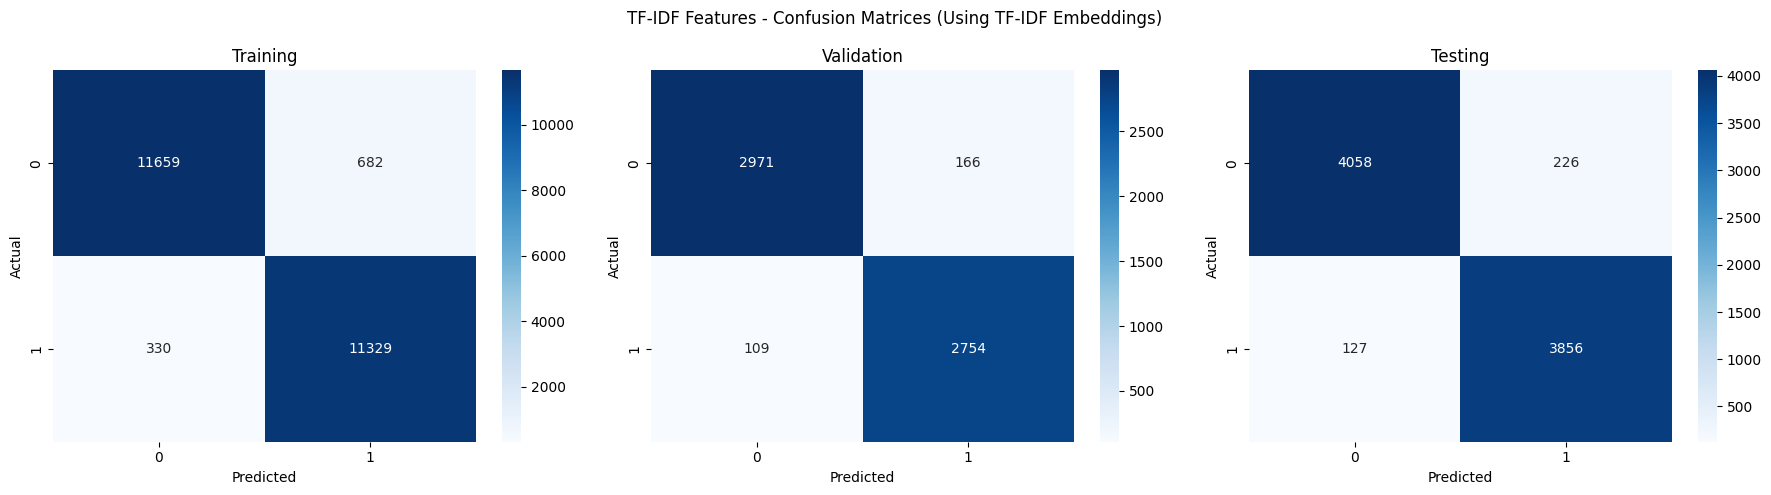


GloVe Features Results (Using GloVe Embeddings):
--------------------------------------------------
Training Results:
Accuracy: 0.8822
Precision: 0.8982
Recall: 0.8544
F1 Score: 0.8758

Validation Results:
Accuracy: 0.8790
Precision: 0.8907
Recall: 0.8509
F1 Score: 0.8703

Testing Results:
Accuracy: 0.8836
Precision: 0.9001
Recall: 0.8531
F1 Score: 0.8760


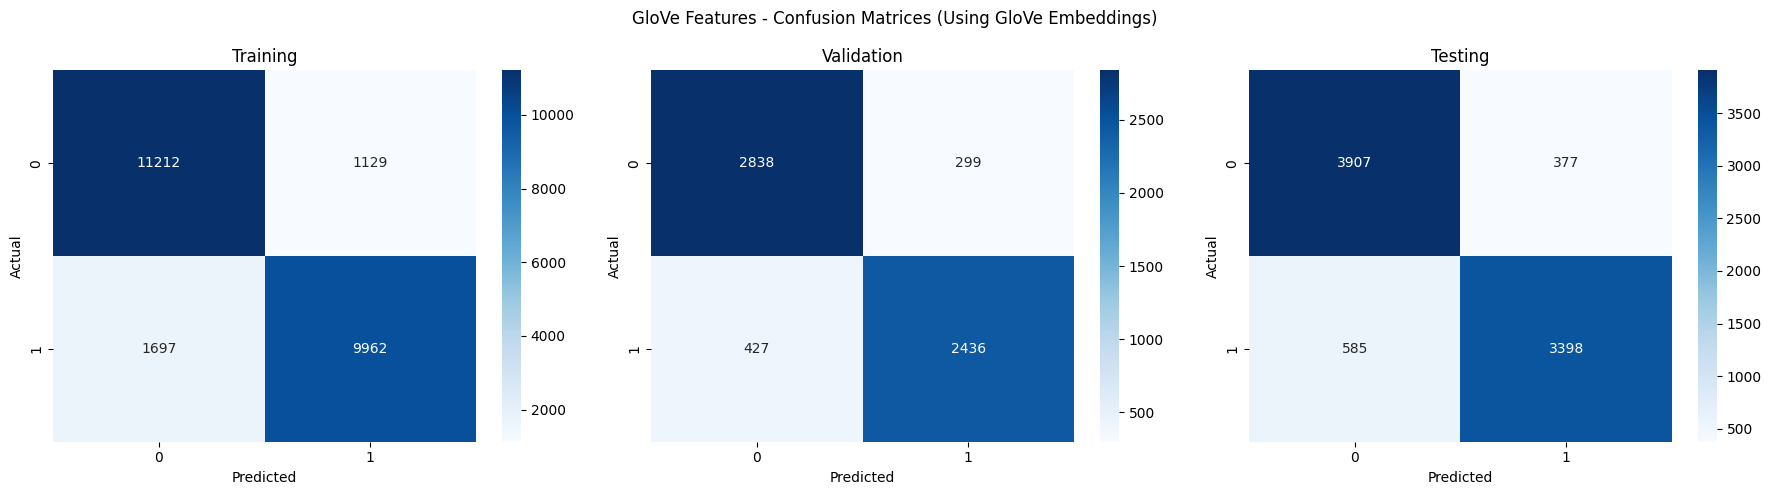

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize scaler
scaler = MinMaxScaler()

# BOW features
X_bow = bow_train_df.drop('label', axis=1)
y_bow = bow_train_df['label']
X_bow = scaler.fit_transform(X_bow)
X_bow_train, X_bow_val, y_bow_train, y_bow_val = train_test_split(X_bow, y_bow, test_size=0.2, random_state=42)
X_bow_test = bow_test_df.drop('label', axis=1)
X_bow_test = scaler.transform(X_bow_test)
y_bow_test = bow_test_df['label']

# TF-IDF features 
X_tfidf = tfidf_train_df.drop('label', axis=1)
y_tfidf = tfidf_train_df['label']
X_tfidf = scaler.fit_transform(X_tfidf)
X_tfidf_train, X_tfidf_val, y_tfidf_train, y_tfidf_val = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)
X_tfidf_test = tfidf_test_df.drop('label', axis=1)
X_tfidf_test = scaler.transform(X_tfidf_test)
y_tfidf_test = tfidf_test_df['label']

# GloVe features
X_glove = glove_train_df.drop('label', axis=1)
y_glove = glove_train_df['label']
X_glove = scaler.fit_transform(X_glove)
X_glove_train, X_glove_val, y_glove_train, y_glove_val = train_test_split(X_glove, y_glove, test_size=0.2, random_state=42)
X_glove_test = glove_test_df.drop('label', axis=1)
X_glove_test = scaler.transform(X_glove_test)
y_glove_test = glove_test_df['label']

# Train and evaluate model for each feature type
feature_sets = [
    ('BOW', X_bow_train, X_bow_val, X_bow_test, y_bow_train, y_bow_val, y_bow_test),
    ('TF-IDF', X_tfidf_train, X_tfidf_val, X_tfidf_test, y_tfidf_train, y_tfidf_val, y_tfidf_test),
    ('GloVe', X_glove_train, X_glove_val, X_glove_test, y_glove_train, y_glove_val, y_glove_test)
]

for feature_name, X_train, X_val, X_test, y_train, y_val, y_test in feature_sets:
    print(f"\n{feature_name} Features Results (Using {feature_name} Embeddings):")
    print("-" * 50)
    
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Get predictions for all sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Calculate metrics for validation data
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)

    # Calculate metrics for test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print("Training Results:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")

    print("\nValidation Results:")
    print(f"Accuracy: {val_accuracy:.4f}")
    print(f"Precision: {val_precision:.4f}")
    print(f"Recall: {val_recall:.4f}")
    print(f"F1 Score: {val_f1:.4f}")

    print("\nTesting Results:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")

    # Create confusion matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    val_cm = confusion_matrix(y_val, y_val_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{feature_name} Features - Confusion Matrices (Using {feature_name} Embeddings)')

    # Plot training confusion matrix
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Training')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')

    # Plot validation confusion matrix
    sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
    ax2.set_title('Validation')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')

    # Plot testing confusion matrix
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=ax3)
    ax3.set_title('Testing')
    ax3.set_xlabel('Predicted')
    ax3.set_ylabel('Actual')

    plt.tight_layout()
    plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = bow_train_df.drop('label', axis=1)
y = bow_train_df['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
X_test = bow_test_df.drop('label', axis=1)
X_test = scaler.transform(X_test)
y_test = bow_test_df['label']

In [9]:
X_train.shape,X_val.shape, X_test.shape , y_train.shape , y_val.shape , y_test.shape



((24000, 4999), (6000, 4999), (8267, 4999), (24000,), (6000,), (8267,))

In [9]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42), 
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in tqdm(models.items(), desc="Training models"):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions for all sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Calculate metrics for validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    
    # Calculate metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Print metrics for each model
    print(f"\n------------{name}------------")
    print("Training Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    
    print("\nValidation Metrics:")
    print(f"Accuracy: {val_accuracy:.4f}")
    print(f"Precision: {val_precision:.4f}")
    print(f"Recall: {val_recall:.4f}")
    print(f"F1 Score: {val_f1:.4f}")
    
    print("\nTest Metrics:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")


Training models:  10%|█         | 1/10 [00:30<04:32, 30.26s/it]


------------Random Forest------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 0.9982
Precision: 0.9979
Recall: 0.9983
F1 Score: 0.9981

Test Metrics:
Accuracy: 0.9983
Precision: 0.9970
Recall: 0.9995
F1 Score: 0.9982


Training models:  20%|██        | 2/10 [01:38<07:01, 52.74s/it]


------------ExtraTrees------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 0.9993
Precision: 0.9986
Recall: 1.0000
F1 Score: 0.9993

Test Metrics:
Accuracy: 0.9993
Precision: 0.9985
Recall: 1.0000
F1 Score: 0.9992


Training models:  30%|███       | 3/10 [01:40<03:27, 29.64s/it]


------------Logistic Regression------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Training models:  40%|████      | 4/10 [01:55<02:22, 23.77s/it]


------------XGBoost------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


/home/subarno/Desktop/BHU hACKATHON/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11659, number of negative: 12341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.161389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34829
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 4999
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485792 -> initscore=-0.056849
[LightGBM] [Info] Start training from score -0.056849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/home/subarno/Desktop/BHU hACKATHON/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/subarno/Desktop/BHU hACKATHON/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/subarno/Desktop/BHU hACKATHON/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training models:  50%|█████     | 5/10 [01:57<01:19, 15.88s/it]


------------LightGBM------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Training models:  60%|██████    | 6/10 [03:19<02:33, 38.36s/it]


------------AdaBoost------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Training models:  70%|███████   | 7/10 [10:37<08:26, 168.95s/it]


------------SVM------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 0.9995
Precision: 1.0000
Recall: 0.9990
F1 Score: 0.9995

Test Metrics:
Accuracy: 0.9977
Precision: 1.0000
Recall: 0.9952
F1 Score: 0.9976


Training models:  80%|████████  | 8/10 [11:18<04:16, 128.28s/it]


------------KNN------------
Training Metrics:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1 Score: 0.9999

Validation Metrics:
Accuracy: 0.9998
Precision: 0.9997
Recall: 1.0000
F1 Score: 0.9998

Test Metrics:
Accuracy: 0.9998
Precision: 0.9995
Recall: 1.0000
F1 Score: 0.9997


Training models:  90%|█████████ | 9/10 [12:36<01:52, 112.67s/it]


------------Neural Network------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997

Test Metrics:
Accuracy: 0.9990
Precision: 0.9992
Recall: 0.9987
F1 Score: 0.9990


Training models: 100%|██████████| 10/10 [16:11<00:00, 97.17s/it] 


------------Gradient Boosting------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42), 
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in tqdm(models.items(), desc="Training models"):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions for all sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Calculate metrics for validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    
    # Calculate metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Print metrics for each model
    print(f"\n------------{name}------------")
    print("Training Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    
    print("\nValidation Metrics:")
    print(f"Accuracy: {val_accuracy:.4f}")
    print(f"Precision: {val_precision:.4f}")
    print(f"Recall: {val_recall:.4f}")
    print(f"F1 Score: {val_f1:.4f}")
    
    print("\nTest Metrics:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")



------------XGBoost------------
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


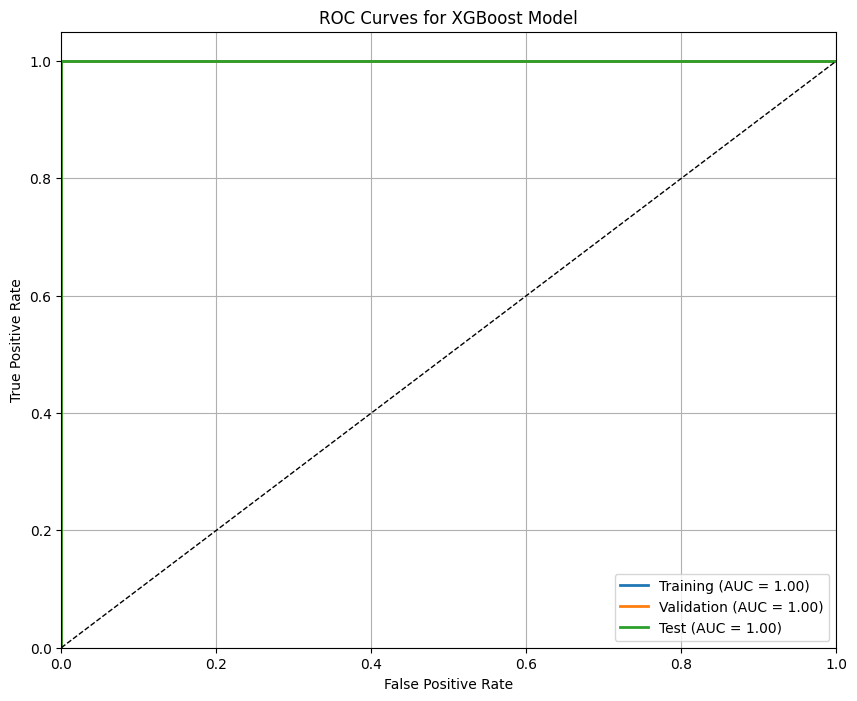

['xgboost_model.joblib']

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and get probabilities for all sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val) 
y_test_pred = model.predict(X_test)

y_train_proba = model.predict_proba(X_train)[:,1]
y_val_proba = model.predict_proba(X_val)[:,1]
y_test_proba = model.predict_proba(X_test)[:,1]

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print metrics
print("\n------------XGBoost------------")
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Plot ROC curves with more threshold points
plt.figure(figsize=(10,8))

# Training set ROC with more points
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba, drop_intermediate=False)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {roc_auc_train:.2f})', linewidth=2)

# Validation set ROC with more points
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba, drop_intermediate=False)
roc_auc_val = auc(fpr_val, tpr_val)
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC = {roc_auc_val:.2f})', linewidth=2)

# Test set ROC with more points
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba, drop_intermediate=False)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.2f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('xgboost_roc_curves.png', dpi=300)
plt.show()

# Save the model
import joblib
joblib.dump(model, 'xgboost_model.joblib')


[I 2024-12-31 22:57:29,553] A new study created in memory with name: no-name-c0c1d3d3-9c6b-42c1-a417-0991f775a2f9
Best trial: 0. Best value: 1:  20%|██        | 1/5 [00:49<03:18, 49.74s/it]

[I 2024-12-31 22:58:19,302] Trial 0 finished with value: 1.0 and parameters: {'max_depth': 7, 'learning_rate': 0.016852933954687347, 'n_estimators': 373, 'min_child_weight': 3, 'gamma': 0.11580431025320136, 'subsample': 0.757857985301297, 'colsample_bytree': 0.9421181596059054}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  40%|████      | 2/5 [01:59<03:04, 61.36s/it]

[I 2024-12-31 22:59:28,797] Trial 1 finished with value: 1.0 and parameters: {'max_depth': 5, 'learning_rate': 0.014835263169183866, 'n_estimators': 358, 'min_child_weight': 1, 'gamma': 0.22256946324076185, 'subsample': 0.951883801764112, 'colsample_bytree': 0.7685672334531656}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  60%|██████    | 3/5 [02:27<01:32, 46.19s/it]

[I 2024-12-31 22:59:56,943] Trial 2 finished with value: 1.0 and parameters: {'max_depth': 7, 'learning_rate': 0.25400429297391164, 'n_estimators': 198, 'min_child_weight': 3, 'gamma': 0.20035541527538903, 'subsample': 0.776597258390635, 'colsample_bytree': 0.6117226573225535}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1:  80%|████████  | 4/5 [03:20<00:48, 48.84s/it]

[I 2024-12-31 23:00:49,846] Trial 3 finished with value: 1.0 and parameters: {'max_depth': 6, 'learning_rate': 0.07332368574809152, 'n_estimators': 296, 'min_child_weight': 1, 'gamma': 0.26306042859249357, 'subsample': 0.6099250927999614, 'colsample_bytree': 0.8913648481772227}. Best is trial 0 with value: 1.0.


Best trial: 0. Best value: 1: 100%|██████████| 5/5 [04:37<00:00, 55.49s/it]


[I 2024-12-31 23:02:07,021] Trial 4 finished with value: 1.0 and parameters: {'max_depth': 9, 'learning_rate': 0.024331431483300765, 'n_estimators': 320, 'min_child_weight': 4, 'gamma': 0.2731210256728282, 'subsample': 0.976291326443479, 'colsample_bytree': 0.9109431188689048}. Best is trial 0 with value: 1.0.

Best trial:
  Value:  1.0
  Params: 
    max_depth: 7
    learning_rate: 0.016852933954687347
    n_estimators: 373
    min_child_weight: 3
    gamma: 0.11580431025320136
    subsample: 0.757857985301297
    colsample_bytree: 0.9421181596059054

------------Tuned XGBoost (Optuna)------------
Training Metrics:
Accuracy: 1.0000
F1 Score: 1.0000

Validation Metrics:
Accuracy: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 1.0000
F1 Score: 1.0000


/tmp/ipykernel_4970/2235925759.py:65: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Figure size 1000x600 with 0 Axes>

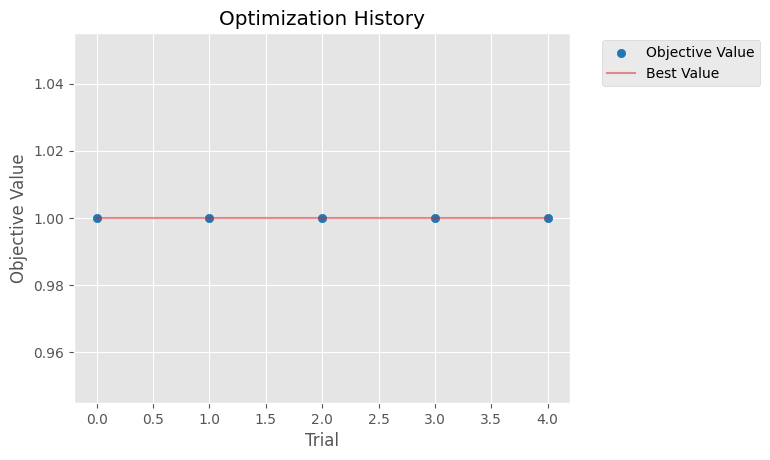

['xgboost_model_tuned.joblib']

In [18]:
# Hyperparameter tuning using Optuna
import optuna

def objective(trial):
    # Define hyperparameter search space
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'gamma': trial.suggest_float('gamma', 0.0, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42
    }
    
    # Create model with current hyperparameters
    model = XGBClassifier(**param)
    
    # Train and evaluate model using validation set
    model.fit(X_train, y_train, verbose=True)
    
    # Return validation F1 score
    y_val_pred = model.predict(X_val)
    return f1_score(y_val, y_val_pred)

# Create study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=True)

# Print optimization results
print("\nBest trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train final model with best parameters
best_params = study.best_params
best_model = XGBClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions with best model
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Calculate and print metrics for best model
print("\n------------Tuned XGBoost (Optuna)------------")
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred):.4f}")

print("\nValidation Metrics:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred):.4f}")

print("\nTest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")

# Plot optimization history
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title('Optimization History')
plt.show()

# Save the best model
joblib.dump(best_model, 'xgboost_model_tuned.joblib')



------------Detailed Test Set Metrics------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      3983

    accuracy                           1.00      8267
   macro avg       1.00      1.00      1.00      8267
weighted avg       1.00      1.00      1.00      8267



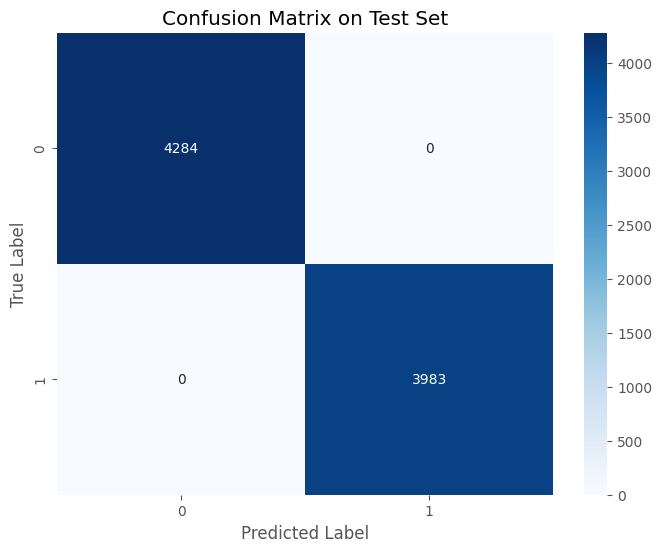


------------Test Set Performance Metrics------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [20]:
# Calculate detailed metrics on test set
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\n------------Detailed Test Set Metrics------------")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate and plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluate model performance on test set directly instead of cross-validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\n------------Test Set Performance Metrics------------")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}") 
print(f"F1 Score: {test_f1:.4f}")


In [21]:
test_ori = pd.read_csv('test.tsv', sep='\t')

In [23]:
# Make predictions on test set
test_preds = best_model.predict(X_test)

# Create list of [title, prediction] pairs
results = [[title, pred] for title, pred in zip(test_ori['title'], test_preds)]

# Write results to file
with open('result.txt', 'w') as f:
    f.write(str(results))